# Imports

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import svm
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib

# Load Data

In [ ]:
%cd '/content/drive/My Drive/IIITD/SEM-7/ML/ML Project/Code/Dataset'

/content/drive/My Drive/IIITD/SEM-7/ML/ML Project/Code/Dataset


In [ ]:
X_train = joblib.load('X_train_cls')
X_test = joblib.load('X_test_cls')

In [ ]:
y_train = joblib.load('y_train')

y_test = pd.read_csv('labels-levela.csv',index_col=0,header=None).to_numpy().ravel()

## Standardize

In [ ]:
# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [ ]:
k_fold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

# Models

## Logistic Regression

### Training

In [ ]:
log_classifier = LogisticRegression(max_iter=2000)

In [ ]:
log_classifier = log_classifier.fit(X_train,y_train)

In [ ]:
# joblib.dump(log_classifier,'logregression_BERT.model')

['logregression_BERT.model']

In [ ]:
# log_classifier = joblib.load('logregression_BERT.model')

### Prediction

In [ ]:
y_pred_logistic = log_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

         NOT       0.85      0.93      0.89       620
         OFF       0.77      0.56      0.65       240

    accuracy                           0.83       860
   macro avg       0.81      0.75      0.77       860
weighted avg       0.82      0.83      0.82       860



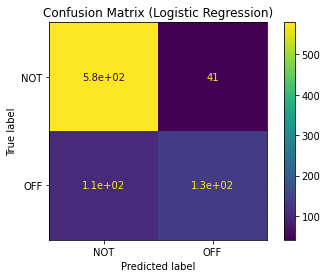

In [ ]:
plot = plot_confusion_matrix(log_classifier,X_test,y_test)
plot.ax_.set_title("Confusion Matrix (Logistic Regression)")
plt.show()

## Naive Bayes Classifier

### Training

In [ ]:
nb_classifier = GaussianNB()

In [ ]:
nb_classifier = nb_classifier.fit(X_train,y_train)

In [ ]:
# joblib.dump(nb_classifier,'naivebayes_BERT.model')

['naivebayes_BERT.model']

In [ ]:
# nb_classifier = joblib.load('naivebayes_BERT.model')

### Prediction

In [ ]:
y_pred_nb = nb_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

         NOT       0.88      0.65      0.75       620
         OFF       0.47      0.78      0.58       240

    accuracy                           0.69       860
   macro avg       0.67      0.71      0.67       860
weighted avg       0.77      0.69      0.70       860



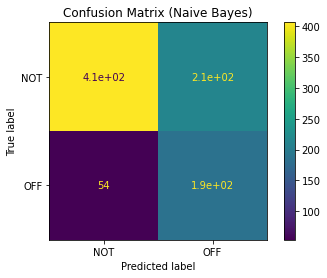

In [ ]:
plot = plot_confusion_matrix(nb_classifier,X_test,y_test)
plot.ax_.set_title("Confusion Matrix (Naive Bayes)")
plt.show()

## Random Forest Classifier

### Training

In [ ]:
rf_classifier = RandomForestClassifier()

In [ ]:
rf_classifier = rf_classifier.fit(X_train,y_train)

In [ ]:
# joblib.dump(rf_classifier,'randomforest_BERT.model')

['randomforest_BERT.model']

In [ ]:
# rf_classifier = joblib.load('randomforest_BERT.model')

### Prediction

In [ ]:
y_pred_rf = rf_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         NOT       0.81      0.95      0.87       620
         OFF       0.75      0.41      0.53       240

    accuracy                           0.80       860
   macro avg       0.78      0.68      0.70       860
weighted avg       0.79      0.80      0.78       860



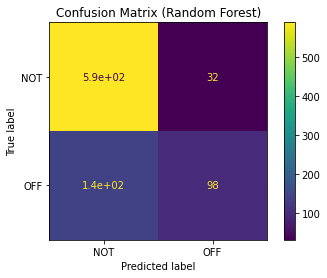

In [ ]:
plot = plot_confusion_matrix(rf_classifier,X_test,y_test)
plot.ax_.set_title("Confusion Matrix (Random Forest)")
plt.show()

## SVM

### Training

In [ ]:
svm_classifier = svm.SVC()

In [ ]:
svm_classifier = svm_classifier.fit(X_train, y_train)

In [ ]:
# joblib.dump(svm_classifier,'svm_BERT.model')

['svm_BERT.model']

In [ ]:
# svm_classifier = joblib.load('svm_BERT.model')

### Prediction

In [ ]:
y_pred_svm = svm_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

         NOT       0.83      0.95      0.89       620
         OFF       0.79      0.49      0.61       240

    accuracy                           0.82       860
   macro avg       0.81      0.72      0.75       860
weighted avg       0.82      0.82      0.81       860



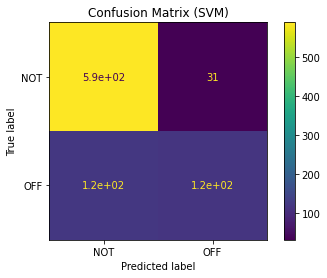

In [ ]:
plot = plot_confusion_matrix(svm_classifier,X_test,y_test)
plot.ax_.set_title("Confusion Matrix (SVM)")
plt.show()

## Artifical Neural Network

In [ ]:
class NN:

    def __init__(self,layers,activation,alpha):
        
        self.n_layers = len(layers)
        self.layers = layers
        self.activation = activation
        self.alpha = alpha
        
        self.model = MLPClassifier(hidden_layer_sizes=self.layers,
                                   activation=self.activation,
                                   alpha=self.alpha,
                                   max_iter=500)
    
    def fit(self,X,y):
        self.model = self.model.fit(X,y)

    def predict(self,X):
        return self.model.predict(X)
    
    def loss(self):
        return self.model.loss_

In [ ]:
NN_classifier = NN(layers=[200,100,100,50],activation='relu',alpha=1e-4)

In [ ]:
NN_classifier.fit(X_train,y_train)

In [ ]:
y_pred_NN = NN_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_NN))

              precision    recall  f1-score   support

         NOT       0.84      0.83      0.84       620
         OFF       0.57      0.61      0.59       240

    accuracy                           0.77       860
   macro avg       0.71      0.72      0.71       860
weighted avg       0.77      0.77      0.77       860



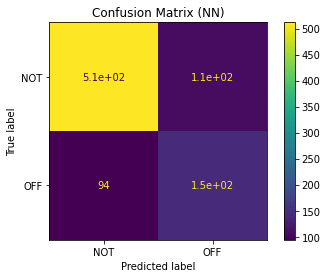

In [ ]:
plot = plot_confusion_matrix(NN_classifier.model,X_test,y_test)
plot.ax_.set_title("Confusion Matrix (NN)")
plt.show()

# Majority Voting

In [ ]:
all_models = {'naive bayes': y_pred_nb,
            'logistic regression': y_pred_logistic,
            'random forest': y_pred_rf,
            'SVM': y_pred_svm,
            'NN':y_pred_NN}

In [ ]:
for key_1 in all_models:

    combination = []
    model_rep = ''
    
    for key_2 in all_models:
        if key_1 != key_2:
            combination.append(all_models[key_2])
            model_rep += ' + ' + key_2
        
    print(model_rep[3:])

    y_pred_voting = stats.mode(np.array(combination))[0][0]
    
    print('accuracy:',accuracy_score(y_test,y_pred_voting))
    print('f1 (macro):',f1_score(y_test, y_pred_voting, average='macro'))

    print()

logistic regression + random forest + SVM + NN
accuracy: 0.8186046511627907
f1 (macro): 0.7303511705685619

naive bayes + random forest + SVM + NN
accuracy: 0.8058139534883721
f1 (macro): 0.7152515489467162

naive bayes + logistic regression + SVM + NN
accuracy: 0.8232558139534883
f1 (macro): 0.7488935333169413

naive bayes + logistic regression + random forest + NN
accuracy: 0.8104651162790698
f1 (macro): 0.724184881522276

naive bayes + logistic regression + random forest + SVM
accuracy: 0.8162790697674419
f1 (macro): 0.7279679679679679

